# ゼロから作るDeep Learning

## 5章 逆誤差伝播法

### 5.1 計算グラフ

- 計算の過程をグラフによって表したもの
- 複数のノードとエッジによって表現される
- ノード間を結ぶ直線をエッジと言う


#### 5.1.1 計算グラフで解く

In [17]:
%pwd

'/mnt/wd500/gotowork/workspace/study-dl-from-scratch/chapter-05'

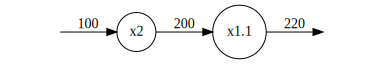

In [35]:
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')

dg.node('apple', image='fruit_apple_small.png', shape='plain', label='')
dg.node('tray', image='money_carton_cashtray_small.png', shape='plain', label='')
dg.edge('apple', 'x2', '100')
dg.edge('x2', 'x1.1', '200')
dg.edge('x1.1', 'tray', '220')

dg


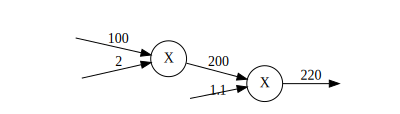

In [42]:
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')
dg.attr('graph', splines='false')

dg.node('apple', image='fruit_apple_small.png', shape='plain', label='')
dg.node('tray', image='money_carton_cashtray_small.png', shape='plain', label='')
dg.node('x1', label='X')
dg.node('x2', label='X')
dg.node('apple_count', label='リンゴの個数', shape='plain')
dg.node('tax', label='消費税', shape='plain')
dg.edge('apple', 'x1', '100')
dg.edge('apple_count', 'x1', '2')
dg.edge('x1', 'x2', '200')
dg.edge('tax', 'x2', '1.1')
dg.edge('x2', 'tray', '220')

dg


問２：リンゴを２個、みかんを３個買いました。リンゴは１個１００円、みかんは１個１５０円、消費税は１０％です。支払う金額は？

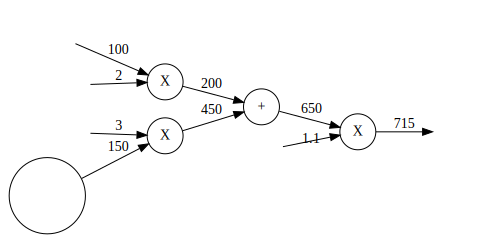

In [45]:
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')
dg.attr('graph', splines='false')

dg.node('apple', image='fruit_apple_small.png', shape='plain', label='')
dg.node('tray', image='money_carton_cashtray_small.png', shape='plain', label='')
dg.node('orange', label="みかん")
dg.node('x1', label='X')
dg.node('x2', label='X')
dg.node('x3', label='X')
dg.node('+1', label='+')
dg.node('apple_count', label='リンゴの個数', shape='plain')
dg.node('orange_count', label='みかんの個数', shape='plain')
dg.node('tax', label='消費税', shape='plain')
dg.edge('apple', 'x1', '100')
dg.edge('apple_count', 'x1', '2')
dg.edge('orange', 'x2', '150')
dg.edge('orange_count', 'x2', '3')
dg.edge('x1', '+1', '200')
dg.edge('x2', '+1', '450')
dg.edge('+1', 'x3', '650')
dg.edge('tax', 'x3', '1.1')
dg.edge('x3', 'tray', '715')

dg


#### 5.1.3 なぜ計算グラフで解くのか？

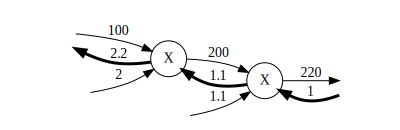

In [55]:
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')
#dg.attr('graph', splines='false')

dg.node('apple', image='fruit_apple_small.png', shape='plain', label='')
dg.node('tray', image='money_carton_cashtray_small.png', shape='plain', label='')
dg.node('x1', label='X')
dg.node('x2', label='X')
dg.node('apple_count', label='リンゴの個数', shape='plain')
dg.node('tax', label='消費税', shape='plain')
dg.edge('apple', 'x1', '100')
dg.edge('apple', 'x1', '2.2', dir='back', penwidth='3pt')
dg.edge('apple_count', 'x1', '2')
dg.edge('x1', 'x2', '200')
dg.edge('x1', 'x2', '1.1', dir='back', penwidth='3pt')
dg.edge('tax', 'x2', '1.1')
dg.edge('x2', 'tray', '220')
dg.edge('x2', 'tray', '1', dir='back', penwidth='3pt')

dg
